# Support Vector Machines Project

In this project, we will be using the famous iris flower data set to train a support vector machine model. 

The three classes (evenly balanced) in this dataset: 

- Iris-setosa
- Iris-versicolor
- Iris-virginica

The four features, measured in centimeters: 

- sepal length
- sepal width
- petal length
- petal width

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Get Data

In [2]:
#use Seaborn to get the data

df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis

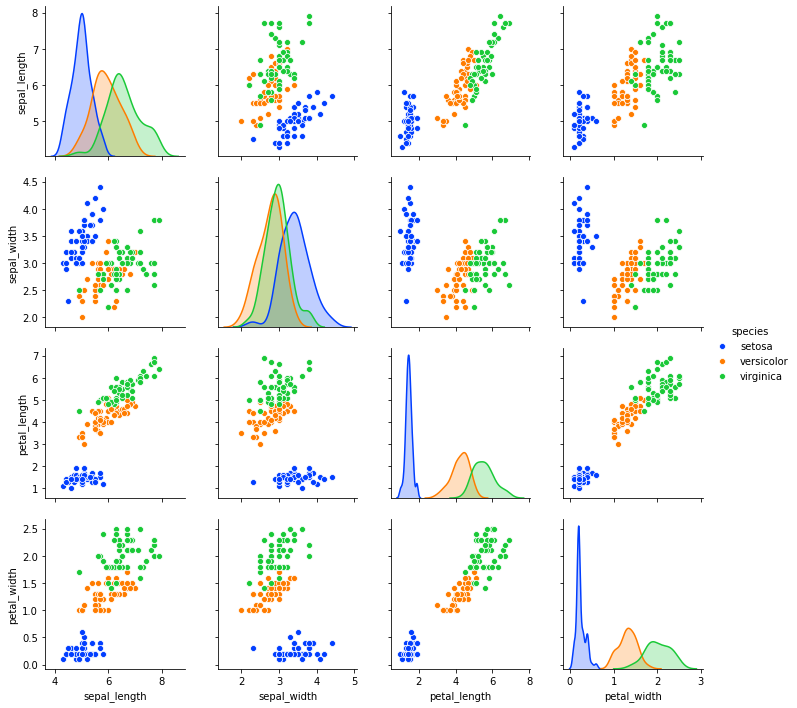

In [3]:
#create pairplot, hued by 'species'

#plt.figure(figsize=(11,11))
sns.pairplot(df, hue='species', palette='bright')

Based on what we see in the pairplot, it looks like Iris-setosa is the most apparent separable species of Iris compared to the other two. 

In [4]:
# create a kde plot of sepal width vs sepal length for Iris-setosa

#sns.kdeplot(df['sepal_width'][df.species == 'setosa'],
#            df['sepal_length'][df.species == 'setosa'],
#            cmap="plasma", shade=True, shade_lowest=False)

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

### Train SVM Model

In [6]:
#import the SVM classifier
from sklearn.svm import SVC

#instantiate the classifier
svc = SVC(gamma='scale')

#fit model to training data
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Model Evaluation

In [12]:
#predictions
predictions = svc.predict(X_test)

In [8]:
#import confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
#confusion matrix
print(confusion_matrix(y_test, predictions))

[[14  0  0]
 [ 0 12  2]
 [ 0  1 16]]


In [10]:
#classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      0.86      0.89        14
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### Gridsearch

The model did pretty well, but let's see if we can tune some model parameters to get even better results, although our model results above would be satisfactory in real world scenarios.

Grid search will be used to train combinations of the 'C' and 'gamma' parameters. 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
#create a dictionary p_grid that contains parameter values for C and gamma
p_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [21]:
#instantiate a GridSearchCV object
#specify refit=True so that you can fit on the best parameters born out of the grid search
gs = GridSearchCV(SVC(), p_grid, refit=True, verbose=3, cv=5)

gs.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.957, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.950, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.957, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=100, gamma=0.1, score=0.905, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.950, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.957, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
print(gs.best_estimator_)
print('\n')
print(gs.best_params_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


{'C': 1, 'gamma': 1}


In [17]:
#use the grid search optimized model to predict labels
gs_predictions = gs.predict(X_test)

In [18]:
print(confusion_matrix(y_test, gs_predictions))

[[14  0  0]
 [ 0 12  2]
 [ 0  0 17]]


In [19]:
print(classification_report(y_test, gs_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.86      0.92        14
   virginica       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



We can see above that the model performed slightly better--it looks like there were 2 noisy points that the model couldn't label correctly.